# Régression logistique - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données représente les chances de différents étudiants d'être admis à un programme universitaire en fonction de leurs résultats à deux examens

### Charger les données du fichier ex2data1.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("ex2data1.csv")
print (data)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.
        exam1      exam2  admission
0   34.623660  78.024693          0
1   30.286711  43.894998          0
2   35.847409  72.902198          0
3   60.182599  86.308552          1
4   79.032736  75.344376          1
5   45.083277  56.316372          0
6   61.106665  96.511426          1
7   75.024746  46.554014          1
8   76.098787  87.420570          1
9   84.432820  43.533393          1
10  95.861555  38.225278          0
11  75.013658  30.603263          0
12  82.307053  76.481963          1
13  69.364589  97.718692          1
14  39.538339  76.036811          0
15  53.971052  89.207350          1
16  69.070144  52.740470          1
17  67.946855  46.678574          0
18  70.661510  92.927138          1
19  76.978784  47.575964          1
20  67.372028  42.838438          0
21  89.676776  65.799366          1
22  50.534788  48.855812  

### Visualiser les données

Cette semaine nous vous fournissons la visualisation des données, mais normalement vous auriez à produire un graphe semblable avec matplotlib.

<img src="figure-1.png">

### Découpez vos données en une matrice X et un vecteur y et transformerz-les en array numpy

In [3]:
X = np.array(data)
X = X[ :, :2]
X = np.insert(X, 0, 1, axis=1)
y = np.array([data.admission])
print (X)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

Vérifiez bien les dimensions de vos structures de données (X.shape)  
Rappelez-vous qu'il est judicieux de fixer les dimensions des vecteurs, par ex. (3,) avec la fonction reshape(3,1).
La matrice X doit-elle être de dimensions m x n ou bien m x (n+1) ? Quelle est la valeur de n?

### Initialisez theta en un vecteur de zéros

Combien de zéros vous faudra-t-il....?

In [4]:
theta = np.zeros(3)

## Formulation de l'hypothèse

Revoyez l'équation de l'hypothèse de la régression logistique. Le produit de theta et de X est enveloppé dans une fonction g(z) qui correspond à la fonction sigmoïde. Nous allons commencer par coder cette fonction.

### Écrivez une fonction _sigmoid_ qui applique la sigmoïde à son argument et retourne le résultat. Si elle reçoit une matrice ou un vecteur en input, elle doit s'appliquer sur chaque élément individuellement et retourner une structure de mêmes dimensions

In [5]:
def sigmoid(z):
    res = 1/(1 + np.exp(-z)) 
    return (res)

print (sigmoid (1))
    

0.7310585786300049


Vérifiez votre fonction. Quelle valeur renvoie une sigmoïde si z=0? Si z est grand? Si z est petit?  
Il est possible que vous ayez un bug lorsque la fonction exponentielle reçoit des valeurs trop grandes. Dans ce cas vous pourrez éventuellement remplacer votre fonction sigmoïde par celle de scipy pour éviter des problèmes dans le reste de votre implémentation.

### Écrivez une fonction _predict_, qui correspond à l'hypohèse hθ(x), qui prend en paramètres X et theta, applique l'hypothèse du modèle avec la fonction sigmoide, et se débrouille pour que le résultat final soit un vecteur de 1 et de 0 correspondant aux catégories

In [6]:
def predict(X, theta):
    return sigmoid(np.matmul(X, np.transpose(theta)))

## Entraînement du modèle

### Définissez la fonction de coût de votre modèle

In [7]:
def cost(X, y, theta):
    diff = np.sum(-y * np.log(predict(X, theta)) - (1 - y) * np.log(-predict(X, theta) + 1))
    return (diff/len(X))

### Calculez le coût de votre modèle non entraîné. Vous devriez obtenir une valeur d'environ 0.693

In [8]:
print (cost(X, y, [0, 0, 0]))

0.6931471805599453


### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris, ainsi que l'évolution du coût

Noter que l'exercice original ne fait pas faire la descente du gradient pour entraîner le modèle, mais plutôt une fonction d'optimisation avancée (_fminunc_ en Matlab). Nous tenterons de faire quand même la descente du gradient. Les plus téméraires peuvent aussi trouver une fonction d'optimisation équivalente en Python et comparer les résultats.

In [9]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variables utiles
    m = len(X)
    J_history = np.arange(num_iters, dtype = float)
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        a = predict(X, theta) - y.T
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        theta -= alpha * np.matmul(a.T, X) / m
        J_history[i] = cost(X, y, theta)
    return theta, J_history

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!!

Voyez entre vous quelles valeurs semblent correctes pour alpha et num_iters

In [13]:
theta = np.array([[0., 0., 0.]])
theta, J_history = fit(X, y, theta, 0.001547, 200000)
print (theta)

[[-9.83231664  0.08414376  0.07787827]]


### Appelez la fonction _cost_ avec le nouveau theta après entraînement

Vous devriez obtenir une valeur autour de 0.203

In [14]:
print (cost(X, y, theta))

109.4712310635211


### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

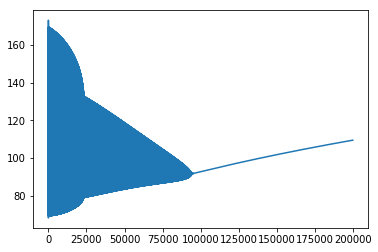

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(J_history)

## Évaluation de votre modèle

Nous allons évaluer la performance du modèle de deux façons:

### Évaluez la probabilité qu'un étudiant ayant obtenu 45 au premier examen, et 85 au deuxième, soit admis

Vous devriez avoir une probabilité d'admission de 0.776

### Évaluer l'exactitude (accuracy) des prédictions faites sur les données d'entraînement

Utilisez votre fonction _predict_ sur les données d'entraînement (X) et récupérez les prédictions dans un vecteur p

In [ ]:
p = 

Calculez le pourcentage des éléments de p qui correspondent à ceux de y. Ça vous donne le score d'exactitude

Vous devriez avoir un score d'environ 89.0 %

### Quelle est la précision, le recall et le F1-score de votre modele ? (écrivez trois fonctions pour obtenir chacunes de ces métriques)

### A l'aide de l'hyperparameter tuning (random search), trouvez les alpha et lambda qui permettent de maximiser le F1-score. Vous devrez entrainer plusieurs fois votre modele à l'aide de la fonction fit pour trouver ces parametres.

## BONUS: Visualisez la frontière de décision (decision boundary) sur le graphe

Pour ceux qui veulent découvrir Matplotlib, il faut ici afficher les données en deux nuages de points distincts (pour les deux classes) sur le même graphe, et aussi trouver une façon de tracer la fonction qui définit la frontière de décision. Amusez-vous bien, et surtout aidez-vous! Voici un exemple de ce que ça devrait donner:  
<img src="figure-2.png">